<a href="https://colab.research.google.com/github/rayoen0/data-analytics-with-python-classroom-1a8e1c-streamlit-exercise-Streamlit-Exercise/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us work with the dataset stored in [**house_prices.csv**](https://raw.githubusercontent.com/zhouy185/BUS_O712/refs/heads/main/Data/house_prices.csv) (click to download the file). This dataset includes the features of houses and the price at which it was sold in the current year (2024).
It includes the following variables:
* **Size (sq ft)**: This is the total area of the house
* **Number of Rooms**: The total number of bedrooms in the house
* **Neighborhood**: The type of the neighborhood the house is in
* **Year Built**: The year in which the house is built
* **Price**: The price at which the house was sold.

In this exercise, we will use linear regression model for prediction.

First, load the data and replace 'Year Built' with age of the house (as of 2025)

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/zhouy185/BUS_O712/refs/heads/main/Data/house_prices.csv')
df.head()

,Size (sq ft),Number of Rooms,Neighborhood,Year Built,Price
0,3532,4,Suburb,1976,1195126.0
1,3407,5,Downtown,2010,1412375.0
2,2453,5,Countryside,1968,797476.0
3,1635,3,Downtown,1986,523051.0
4,1563,2,Suburb,1970,532291.0


In [5]:
df['age'] = 2025 - df['Year Built']

In [3]:
y = df['Price']
X = df.drop(['Price', 'Year Built'], axis=1)

X,y

(     Size (sq ft)  Number of Rooms Neighborhood
 0            3532                4       Suburb
 1            3407                5     Downtown
 2            2453                5  Countryside
 3            1635                3     Downtown
 4            1563                2       Suburb
 ..            ...              ...          ...
 495          2668                2  Countryside
 496          2098                3       Suburb
 497          3074                5  Countryside
 498          2049                1     Downtown
 499          2763                1     Downtown
 
 [500 rows x 3 columns],
 0      1195126.0
 1      1412375.0
 2       797476.0
 3       523051.0
 4       532291.0
          ...    
 495     791199.0
 496     717297.0
 497    1426623.0
 498     694656.0
 499     859475.0
 Name: Price, Length: 500, dtype: float64)

Then, visualize the correlation between columns.

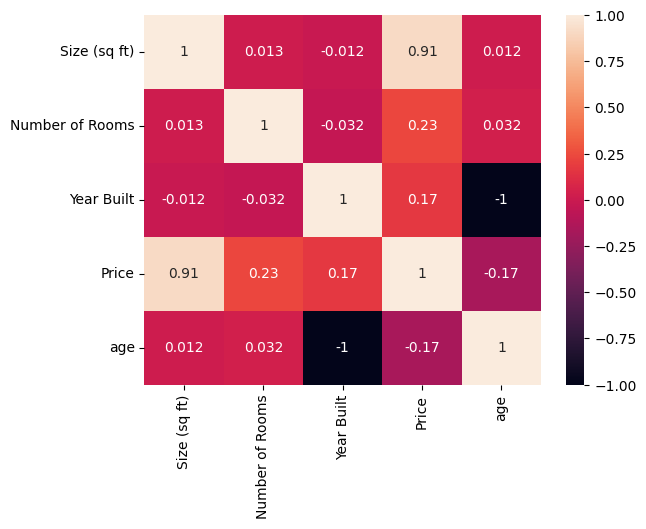

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Perform the splits

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, integrate preprocessing (one hot encoding), linear regression, model fitting into a pipeline.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = ["cat", OneHotEncoder(sparse_output = False, drop = "first"),
                                       ['Neighborhood']], remainder = "passthrough")


Finally, use the fitted pipeline to do prediction.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline(steps = [("preprocessing", ct), ("model", LinearRegression())])

In [20]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Neighborhood'])])),
                ('model', LinearRegression())])

In [23]:
X_train.head(2)
new_house = pd.DataFrame([[3000,2,"Downtown"],[2000, 3, "Midtown"]], columns = X_train.columns)

new_house
pipe.predict(new_house)

array([980129.05612612, 696774.38206959])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 14517820026.142105
R-squared: 0.8530182832822238
